# API-201 ABC REVIEW SESSION #8

**Friday, November 4**

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercise - Factors Associated with Infant Birth Weight](#Exercises)

# Lecture Recap <a class="anchor" id="Lecture-Recap"></a>

## Constructing confidence intervals

An **estimate** is our best guess of the true value of the population parameter. There are multiple types of parameters that we could be interested in estimating. For example:
1. Proportion: Proportion of vaccinated people that got Covid.
2. Mean: Average consumption for people that had access to a microfinance program in India.
3. Difference in proportions: Difference in Covid infection rates between those who got vaccinated and those who didn’t.
4. Difference in means: Difference in average consumption between treatment
and control groups of a microfinance program in India.

We can use the sampling distribution of our estimator to tell us how confident we are in our estimate. The table below contains the information we need to construct a confidence interval for each of these parameters:

|  Population parameter | Sample parameter | Mean of sampling distribution | Standard deviation of sampling distribution
| --- | --- | --- | --- 
| $p$ | $\hat{p}$  |  $E(\hat{p})= p$ | $\sqrt{\frac{p(1-p)}{n}}$
| $\mu$ | $\hat{\mu}$ |  $E(\hat{\mu})= \mu$ | $\frac{\sigma}{\sqrt{n}}$
| $p_1 - p_2$ | $\hat{p_1} - \hat{p_2}$ |  $E(\hat{p_1} - \hat{p_2})= p_1 - p_2$  | $\sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}$
| $\mu_1 - \mu_2$ | $\hat{\mu_1} - \hat{\mu_2}$ |  $E(\hat{\mu_1} - \hat{\mu_2})= \mu_1 - \mu_2$  | $\sqrt{\frac{\sigma^2_1}{n_1} + \frac{\sigma^2_2}{n_2}}$

For example, if we wanted to estimate the difference in proportions, the 95% confidence interval has the same form as before:
\begin{align*}
CI = \hat{p_1} - \hat{p_2} \pm 2 SD(\hat{p_1} - \hat{p_2})
\end{align*}

Plugging in the standard deviation of the difference in proportions, we get:

\begin{align*}
CI = \hat{p_1} - \hat{p_2} \pm 2 \sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}}
\end{align*}

## Statistical significance

**Hypothesis testing** consists in posing a hypothesis concerning the value of a population parameter, drawing a sample from the population _under the assumption this hypothesis is true_, and then
assessing the estimate with respect to the hypothesis posed. The observed value is **statistically significant** if it is unlikely under the null hypothesis. 

There are three different ways to compute statistical significance:

**1. Checking whether our point estimate was in the feasible region under the null hypothesis.**

We compute the range of likely values for the estimate if the null hypothesis were true and then check whether the actually observed value is likely under the null hypothesis. If it is unlikely (in other words, it doesn’t fall within the middle 95% of the null sampling distribution), then we reject the null hypothesis and say that our result is statistically significant. 

**2. Checking whether our confidence interval contained the null hypothesis.**

An estimate is statistically significant if it is at least two standard deviations away from the null hypothesis, so that we reject only the most extreme 5 percent of values. 

The confidence interval consists of those points within two standard deviations of the estimate. So an estimate is statistically significant if its confidence interval does not contain the null hypothesis.

**3. Computing a p-value.**

The **p-value** is the probability of obtaining an estimate as extreme or more extreme than the one we obtained assuming our null hypothesis is true. A result is statistically significant if the p-value is less than 0.05. In other words, if the null hypothesis were true, we are unlikely to have obtained our result. 

We compute p-values using z-scores. The z-score tells us how many standard deviations our estimate is from the null hypothesis:
\begin{align*}
z = \frac{x-\mu_0}{s}
\end{align*}

where $\mu_0$ is the null hypothesis and $s$ is the standard error.

We convert z-scores to p-values with the **pnorm** function in R. For any number z, pnorm(z) returns the probability that the normal random variable is less than z standard deviations below its mean. In order to get both of the "tails" on the extremes of our estimate, we need to make sure we use a negative Z-score and double the value to account for both tails. So if our z-score is z, we can calculate the p-value as `2 * pnorm(-abs(z))`.

## Example

Suppose the Scranton branch of a large paper company wants to test that its outgoing shipment of letter-sized paper is 8.5 inches wide on average. The company randomly samples 100 pieces of paper and finds that the average width is 8.45 inches with a standard deviation of 0.1 inches. 

* The null hypothesis is $\mu = 8.5$. 
* $n = 100$
* $\hat\mu = 8.45$
* $\hat\sigma = 0.1$.

The standard error of the mean is $\frac{\hat\sigma}{\sqrt{n}} = \frac{0.1}{\sqrt{100}} = 0.01$ Therefore the 95% confidence interval is $[8.43, 8.47]$.

The branch found that the mean width in the sample is less than 8.5, but this could just be the result of sample fluctuations. They want to know whether we have enough evidence to reject the null hypothesis that $\mu = 8.5$, so they ask: "if the average size truly is 8.5 inches, how unlikely is it to observe this sample mean?"

The confidence interval does not contain 8.5, so the branch **rejects this null hypothesis.** If instead the confidence interval was wide enough to include 8.5, they would **fail to reject the null hypothesis**. This could either be because the null hypothesis is true, or because the sample size is not large enough to reject it. For example, if the true mean was $\mu = 8.4999$, the null hypothesis is technically false but because the mean is so similar, we would need to have a very large sample size to reject the null hypothesis with regularity. 

Alternatively, we could compute the z-score and find the p-value associated with it.

In [ ]:
# z-score
z_score <- (8.45-8.5)/0.01
c("Z-score" = z_score)

Z-score 
     -5

In [ ]:
# p-value
p <- 2 * pnorm(-abs(z_score))
c("p-value" = p)

p-value 
5.733031e-07

XX placeholder for thursday's lecture

# Exercise: Factors Associated with Infant Birth Weight

In [ ]:
install.packages("MASS")
library(MASS)
library(tidyverse)
data <- birthwt

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()



For this exercise, we will identify factors associated with low infant birth weight using data on 189 births collected at the Baystate Medical Centre, Springfield, Massachusetts during 1986. The variables of interest are `bwt` (birth weight) and the binary variable `low` (low birth weight).

## Data Dictionary

* `low`: indicator of birth weight less than 2,500 grams
* `age`: mother's age in years
* `lwt`: mother's weight at last menstrual period
* `race` : mother's race (1 = white, 2 = black, 3 = other).
* `smoke` : smoking status during pregnancy.
* `ptl` : number of previous premature labours.
* `ht` : history of hypertension.
* `ui` : presence of uterine irritability.
* `ftv` : number of physician visits during the first trimester.
* `bwt` : birth weight in grams.

**1. Examine the first 10 rows of the data. What are some relationships that you would be interested in exploring?**

In [ ]:
head(data)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


**2. A baby is considered to have a low birth weight when they weigh less than 2,500 grams. Using the variable `low`, calculate the number of observations and the proportion of kids with low birth weight by mother's smoking behavior.**


In [ ]:
# Your answer here!

# START

# Get p_NS and p_S
data %>%
  group_by(smoke) %>%
    summarize(prop_low = mean(low),
              n = n())

# END

smoke,prop_low,n
<int>,<dbl>,<int>
0,0.2521739,115
1,0.4054054,74


**3. Denote $\hat{p_{NS}}$ as the sample proportion of kids with low birth weight in the non-smoking group and $\hat{p_S}$ for the smoking group. Using your results from (2), calculate the difference in proportions and the standard error of $\hat{p_{NS}} - \hat{p_S}$.**

In [ ]:
# Your answer here!

# START

# Get the difference in proportion and the standard deviation
mean_diff <- (0.252-0.405)
sd_diff <- sqrt(0.252*(1-0.252)/115+0.405*(1-0.405)/74)
c("Mean of difference in proportions" = mean_diff,
"SE of difference in proportion" = sd_diff)

# END

Mean of difference in proportions    SE of difference in proportion 
                      -0.15300000                        0.06996795

**4. What is the 95% confidence interval of $p_{NS} - p_S$?**

In [ ]:
# Your answer here!

# START

# Construct the CI
lb <- mean_diff - 2 * sd_diff
ub <- mean_diff + 2 * sd_diff
c("Lower bound" = lb, "Upper bound" = ub)

# END

Lower bound Upper bound 
-0.29293591 -0.01306409

**5. What is the Z-score corresponding to the null hypothesis $p_{NS} - p_{S} = 0$?**

In [ ]:
# Your answer here!

# START

# Get the z-score
z_score <- (mean_diff - 0) / sd_diff
c("z-score" = z_score)

# END

z-score 
-2.186715

**6. What is the p-value corresponding to the Z-score? Is the difference in means statistically significant?**

In [ ]:
# Your answer here!

# START

# Calculate the pvalue
p <- 2*pnorm(-abs(z_score))
c("p-value" = p)

# END

p-value 
0.02876331

**7. Suppose that you are interested in estimating the mean birth weight first for kids whose mother didn't smoke during pregnancy, and then for kids whose mother did. Compute a 95% confidence interval for each one. Report your mean values and confidence intervals below.**

In [ ]:
# Your answer here!

# START
data_by_group <- data %>%
    group_by(smoke) %>%
    summarize(bwt_mean = mean(bwt), 
              bwt_sd = sd(bwt),
              n = n()) %>%
    mutate(bwt_lb = bwt_mean - 2 * bwt_sd / sqrt(n),
           bwt_ub = bwt_mean + 2 * bwt_sd / sqrt(n))
data_by_group

# END

smoke,bwt_mean,bwt_sd,n,bwt_lb,bwt_ub
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
0,3055.696,752.6566,115,2915.324,3196.067
1,2771.919,659.6349,74,2618.557,2925.281


**8. Plot your estimates from (7) and add error bars for the 95% confidence interval. Is the difference in mean statistically significant?**

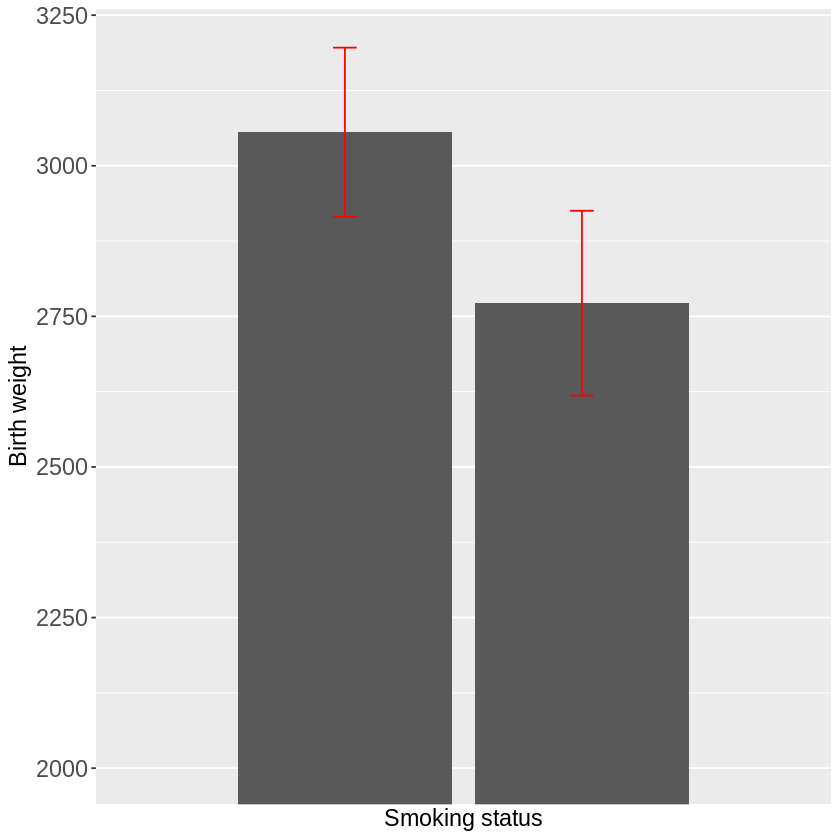

In [ ]:
# Your answer here!

# START
ggplot(data_by_group) +
  geom_col(aes(x = smoke, y = bwt_mean)) +
  geom_errorbar(aes(x = smoke, ymin = bwt_lb, ymax = bwt_ub),
                color = "red", width = .1) +
  scale_x_discrete(labels = c("Didn't smoke", "Smoked")) +
  labs(x = "Smoking status", y = "Birth weight") +
  coord_cartesian(ylim = c(2000, 3200)) +
  theme(axis.text = element_text(size = 14),
        axis.title = element_text(size = 14))

# END

The two individual confidence intervals overlap, so it could go either way. We need to conduct a more careful analysis to determine whether or not there is a statistically significant difference between the
two parameters (i.e., need to construct the confidence interval for the difference in means to be sure).

**9. Is there a positive association between mother's weight at last menstrual period and infant birth weight? Plot both variables and calculate the correlation coefficient.**

In [31]:
ggplot(data)+
  geom_point(aes(x=lwt,y=bwt))

cor(data$lwt,data$bwt)

[1] 0.1857333